## Import dependencies

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## Define parameters

In [2]:
data_dir = '/tmp/data/'
num_steps = 10000
minibatch_size = 32
learning_rate = 0.2

## Load MNIST data

In [16]:
data = input_data.read_data_sets(data_dir, one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Placeholder for Input features

In [4]:
x = tf.placeholder(tf.float32, [None, 784])

## Create weights

In [5]:
W = tf.Variable(tf.zeros([784,10]))

## Placeholder for Output labels

In [6]:
y_t = tf.placeholder(tf.float32, [None, 10])

## Model Equation

In [7]:
y_p = tf.matmul(x,W)

## Loss Function

In [8]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_p, labels=y_t))

## Optimizer: Gradient Step

In [9]:
grad_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

## Define accuracy metric

In [10]:
correct_mask = tf.equal(tf.argmax(y_p, 1), tf.argmax(y_t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

## Train the model

In [11]:
acc_list = []
loss_list = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for j in range(num_steps):
        batch_x , batch_y = data.train.next_batch(minibatch_size)
        sess.run(grad_step, feed_dict={x: batch_x, y_t: batch_y})
        
        if j%100 ==0 :
            loss_list.append(sess.run(cross_entropy, feed_dict={x: batch_x, y_t: batch_y}))
            acc = sess.run(accuracy, feed_dict={x:data.test.images, y_t:data.test.labels})
            #print(f"Iteration :{j} : Acc: {acc}")
            acc_list.append(acc)
    # Test the model
    acc = sess.run(accuracy, feed_dict={x:data.test.images, y_t:data.test.labels})

In [12]:
print("Accuracy: ",acc)

Accuracy:  0.9218


## Plot the accuracy over steps

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

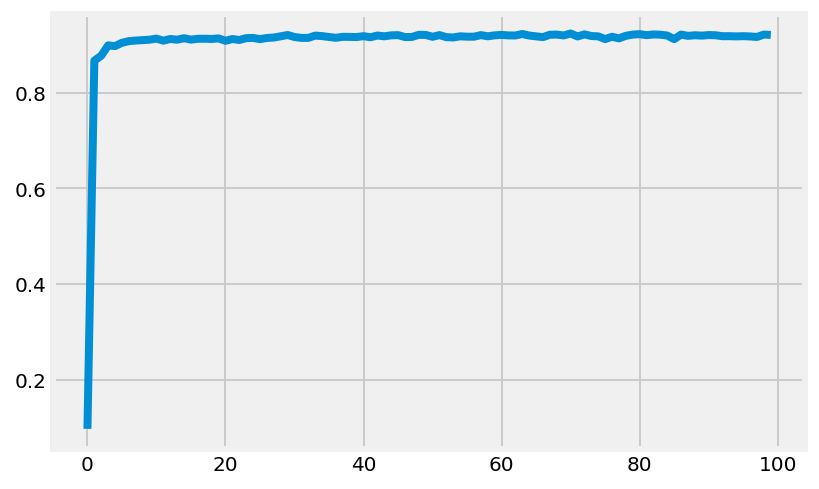

In [14]:
plt.plot(acc_list)
plt.show()

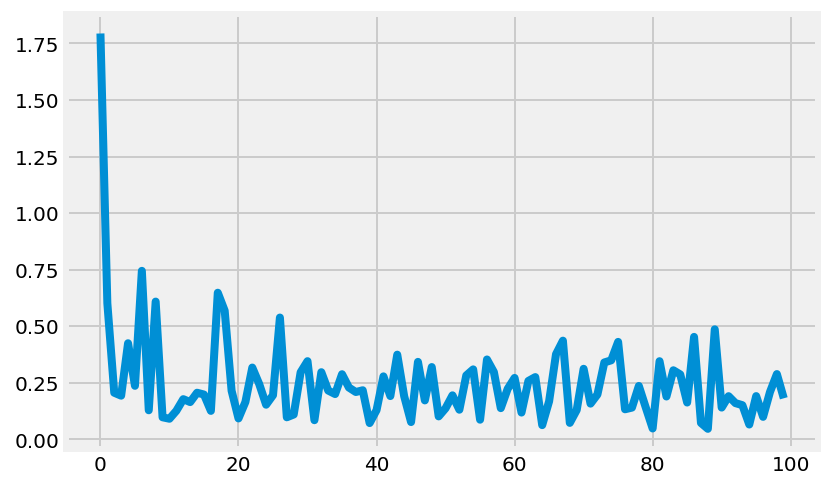

In [15]:
plt.plot(loss_list)
plt.show()